In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sci

In [61]:
def transmission(x,e0,v):
    h_cut = 1
    m_e = 1
    k = np.sqrt(2*m_e*(e0-v))
    p = h_cut * k
    # psi(x) = N*exp(i*k*x) 
    # we will only write the real part
    wf = np.cos(k*x)
    N = normalise(wf,x)
    wf = N*wf
    return wf

In [77]:
def tunneling(x,e0,v):
    m_e = 1
    h_cut = 1
    k = np.sqrt(2*m_e*(v-e0))
    # exp(kx) = (cosh(kx) + sinh(kx))/2
    # exp(-kx) = (cosh(kx) - sinh(kx))/2
    wf = (np.cosh(k*x) - np.sinh(k*x))/2
    N = normalise(wf, x)
    wf = N*wf
    return wf

In [78]:
def original_wf(x,e0,v):
    m_e = 1
    h_cut = 1
    k = np.sqrt(2*m_e*e0)
    wf = np.cos(k*x)
    return wf

In [79]:
def normalise(wf, x):
    prob_den = abs(wf)**2
    norm = 1/np.sqrt(sci.simps(prob_den, x))
    return norm

In [93]:
def interact(e0, v, x):
    if v!= 0:
        ratio = e0/v
        if ratio>=1:
            # transmission
            transmitted_wf = transmission(x, e0, v)
            return transmitted_wf
        elif ratio< 1 and ratio >= 0.01:
            # tunneling
            tunneled_wf = tunneling(x, e0, v)
            return tunneled_wf
        elif ratio < 0.01:
            # infinte barrier condition
            wf_limit = 0
            return wf_limit 
    else: # v= 0
        # no potential barrier
        og_wf = original_wf(x, e0, v)
        return og_wf

In [94]:
x_range = np.arange(-10,10.01,0.01)
e0 = 2
v_a = 0
v_b = 1
v_c = 3

In [95]:
# wf interacting with the different potential barrier
interaction_1 = interact(e0, v_a, x_range)
interaction_2 = interact(e0, v_b, x_range)
interaction_3 = interact(e0, v_c, x_range)

In [96]:
pd1 = abs(interaction_1)**2
pd2 = abs(interaction_2)**2
pd3 = abs(interaction_3)**2

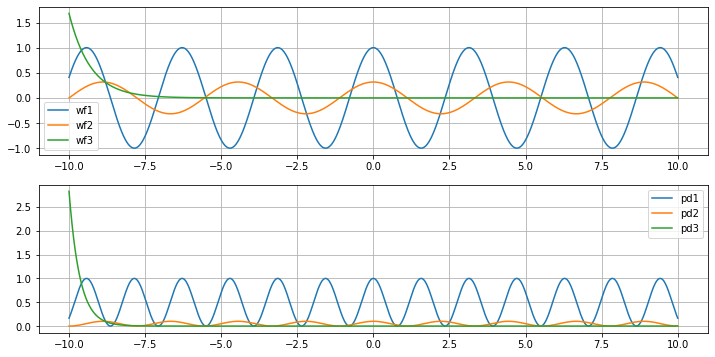

In [97]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(x_range, interaction_1, label = 'wf1')
plt.plot(x_range, interaction_2, label = 'wf2')
plt.plot(x_range, interaction_3, label = 'wf3')
plt.grid()
plt.legend()
plt.subplot(2,1,2)
plt.plot(x_range, pd1, label = 'pd1')
plt.plot(x_range, pd2, label = 'pd2')
plt.plot(x_range, pd3, label = 'pd3')
plt.grid()
plt.legend()

In [100]:
sd1 = np.std(interaction_1)
sd2 = np.std(interaction_2)
round(sd1,4), round(sd2,4)

(0.7121, 0.2224)